# FINAL PROJECT - Data Analysis

|ID's Student|Fullname|Contribute rate (%)|Tasks|
|---------------|---------|---------------------|---------|
|20127028|Võ Văn Hoàng        |100%|Exploratory Data Analysis|
|20127054|Ngô Văn Trung Nguyên|100%|Exploratory Data Analysis|


***The dataset was downloaded by us on the website of Kaggle which is an open source and free for everyone to access and download:***
***https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries/discussion?select=Levels_Fyi_Salary_Data.csv***

---

**<font size="5">Explore Data</font>**

### Environment

In [59]:
import sys
sys.executable

'/home/hoang/miniconda3/envs/min_ds-env/bin/python'

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime
import statistics
import seaborn as sns
from matplotlib import cycler

### Data Analysis Checklist:
- Check the data type whether it is matched with each attribute or not.
- Check the null values and the duplicate values.
- Check the outlier values.
- Check univariate and multivariate correlations.

### Questions about data set:
- Did you clearly understand the attributes in your data sets?
- Have you considered whether the question can be answered with the available data?

### Data preprocessing:
#### Read data from file:

In [61]:
salary_df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
rows, cols = salary_df.shape
print('Number of Rows: ', rows)
print('Number of Columns: ', cols)
salary_df.head()

Number of Rows:  62642
Number of Columns:  29


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


# Content of each column

In [62]:
salary_df.columns

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

# Definition of each column:

|Order|Name of column|Meaning|
|-----|--------------|-------|
|1|timestamp|Date and time that information was recorded|
|2|company|Name of woring company|
|3|level|Level in working job|
|4|title|Job position|
|5|totalyearlycompensation|The final salary received each year($)|
|6|location|Working place|
|7|yearsofexperience|Number of experience years|
|8|yearsatcompany|Number of years working for that company|
|9|tag|Type of work|
|10|basesalary|The raw salary|
|11|stockgrantvalue|Rewarded value by stock|
|12|bonus|Rewarded money|
|13|gender|Male or female|
|14|otherdetails|More description about the job|
|15|cityid|ID of the city|
|16|dmaid|Designated Market Area ID|
|17|rowNumber|Number of rows|
|18|Masters_Degree|Have Master Degree or not|
|19|Bachelors_Degree|Have Bachelors Degree or not|
|20|Doctorate_Degree|Have Doctorate Degree or not|
|21|Highschool|Graduated High School or not|
|22|Some_College|Studied in any college or not|
|23|Race_Asian|Asian|
|24|Race_White|Citizens who have white race|
|25|Race_Two_Or_More|Have 2 or more races|
|26|Race_Black|Citizens who have black race|
|27|Race_Hispanic|American with the root of Latinos or Spanish|
|28|Race|Nation ethnic|
|29|Education|Level of education|




# Is there any redudant or unnecessary column data?


As we can see, 'level', 'cityid', 'dmaid', 'rowNumber', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic' are redudant through our analyse, because:
- fff
- ffff
- ffff
- fffff
- fffff
- đfff

In [63]:
drop_cols = ["level", "cityid", "dmaid", 'rowNumber', "Race_Asian", "Race_White", "Race_Two_Or_More", "Race_Black", "Race_Hispanic" ]
salary_df.drop(drop_cols, axis=1, inplace=True)
salary_df.head()


,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN


**Let's check again the data:**

In [64]:
rows, cols = salary_df.shape
print('Number of Rows: ', rows)
print('Number of Columns: ', cols)
salary_df.head()

Number of Rows:  62642
Number of Columns:  20


,timestamp,company,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race,Education
0,6/7/2017 11:33:27,Oracle,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,0,0,0,0,0,NaN,NaN


---

# Does the data have duplicated rows?

In [65]:
salary_indx_dup = salary_df.index.duplicated().sum()   
print("Number of duplicated index of results DataFrame: ", salary_indx_dup)

Number of duplicated index of results DataFrame:  0


*As you can see, there is no duplicated index from these DataFrames.*

Next we check for duplicated row

In [66]:
salary_dup = salary_df.duplicated().sum()
print('Number of Duplicated Rows of results DataFrame: ', salary_dup)

Number of Duplicated Rows of results DataFrame:  44


*As you can see, there is 0 duplicated data from  DataFrame.*

Now we do not have any duplicated problem here.

---

# Initial Datatypes of Salary DataFrames

In [46]:
salary_df.dtypes

timestamp                   object
company                     object
title                       object
totalyearlycompensation      int64
location                    object
yearsofexperience          float64
yearsatcompany             float64
tag                         object
basesalary                 float64
stockgrantvalue            float64
bonus                      float64
gender                      object
otherdetails                object
Masters_Degree               int64
Bachelors_Degree             int64
Doctorate_Degree             int64
Highschool                   int64
Some_College                 int64
Race                        object
Education                   object
dtype: object

- *timestamp changes from object to datetime*
- *All the object type change to string*

---

# Preprocessing

**1. timestamp changes from object to datetime**

In [47]:
# date changes from object to datetime
salary_df['timestamp'] = pd.to_datetime(salary_df['timestamp'], infer_datetime_format = True)

**2. company, title, location, tag, gender, otherdetails, Race, Education change from object to string**

In [49]:
# company, title, location, tag, gender, otherdetails, Race, Education change from object to string
salary_df['company'] = salary_df['company'].astype('string')
salary_df['title'] = salary_df['title'].astype('string')
salary_df['location'] = salary_df['location'].astype('string')
salary_df['tag'] = salary_df['tag'].astype('string')
salary_df['gender'] = salary_df['gender'].astype('string')
salary_df['otherdetails'] = salary_df['otherdetails'].astype('string')
salary_df['Race'] = salary_df['Race'].astype('string')
salary_df['Education'] = salary_df['Education'].astype('string')


In [50]:
salary_df.dtypes

timestamp                  datetime64[ns]
company                            string
title                              string
totalyearlycompensation             int64
location                           string
yearsofexperience                 float64
yearsatcompany                    float64
tag                                string
basesalary                        float64
stockgrantvalue                   float64
bonus                             float64
gender                             string
otherdetails                       string
Masters_Degree                      int64
Bachelors_Degree                    int64
Doctorate_Degree                    int64
Highschool                          int64
Some_College                        int64
Race                               string
Education                          string
dtype: object

Now we already preprocessed Data

---

# Missing Data

In [51]:
salary_df.isnull().sum()

timestamp                      0
company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22505
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race                       40215
Education                  32272
dtype: int64

We have observed and decided that there are a little bit of data with NONE value.  
There are just only total 8 times did not have the score, 12 times did not have the name of scorer and 96 times did not have the time of a match.  


---

# Outliers Removal

<AxesSubplot: >

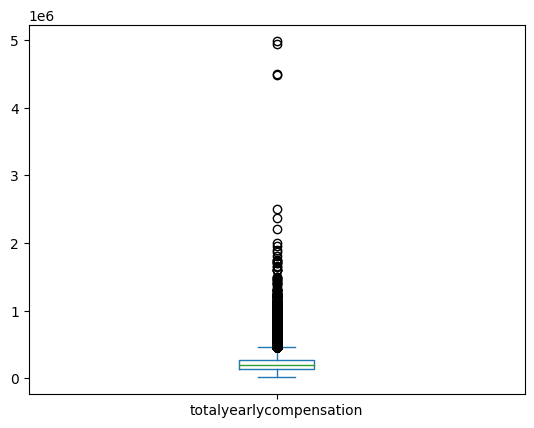

In [19]:
# totalyearlycompensation check
salary_df['totalyearlycompensation'].plot(kind='box')

<AxesSubplot: >

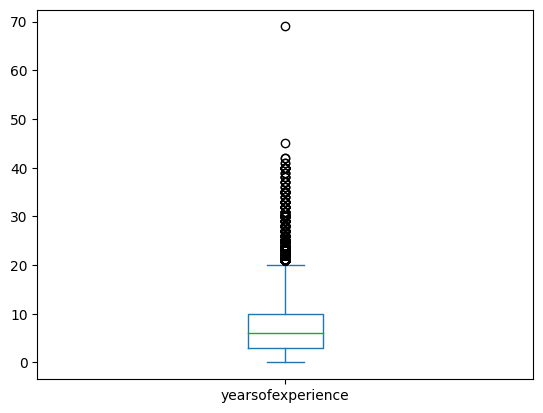

In [20]:
# yearsofexperience check
salary_df['yearsofexperience'].plot(kind='box')

<AxesSubplot: >

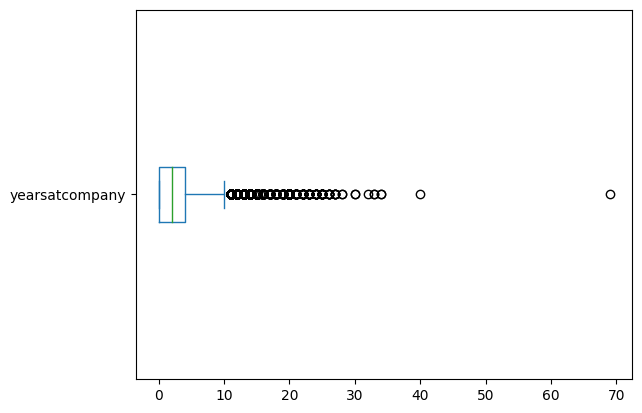

In [22]:
# yearsatcompany check
salary_df['yearsatcompany'].plot(kind='box', vert = False)

<AxesSubplot: >

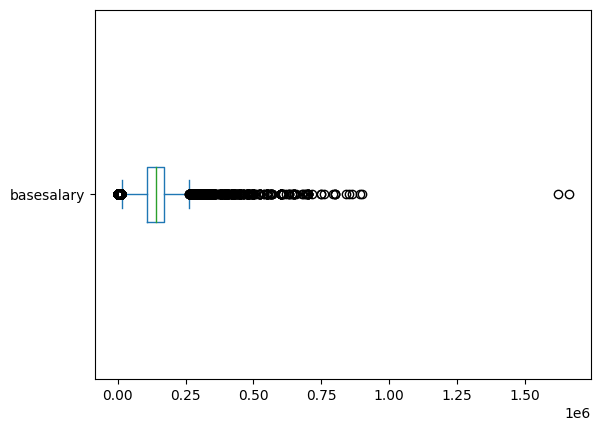

In [23]:
# basesalary check
salary_df['basesalary'].plot(kind='box', vert = False)

<AxesSubplot: >

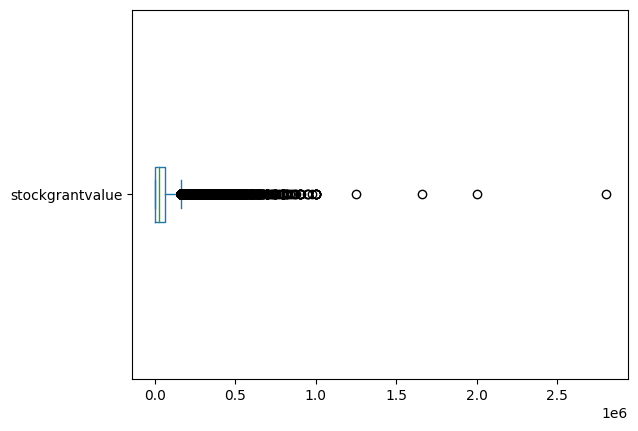

In [24]:
# stockgrantvalue check
salary_df['stockgrantvalue'].plot(kind='box', vert = False)

<AxesSubplot: >

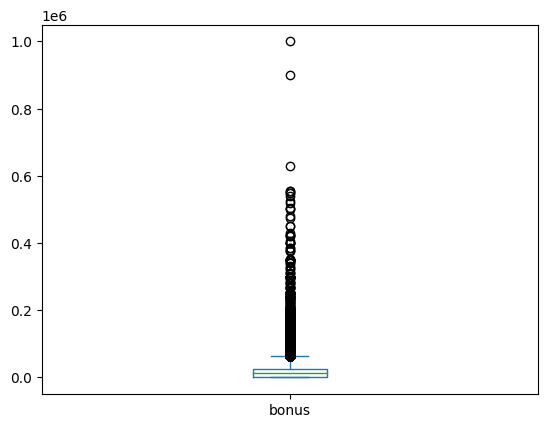

In [25]:
# bonus check
salary_df['bonus'].plot(kind='box')

<AxesSubplot: >

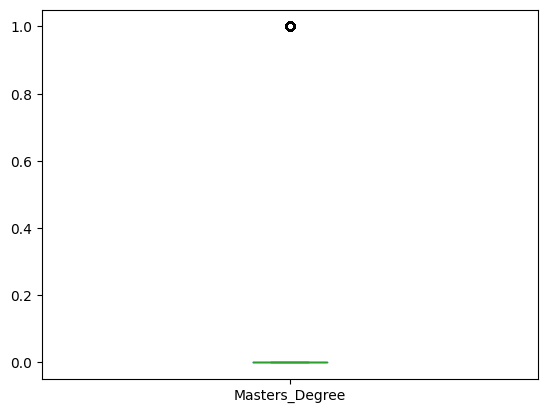

In [52]:
# Masters_Degree check
salary_df['Masters_Degree'].plot(kind='box')

<AxesSubplot: >

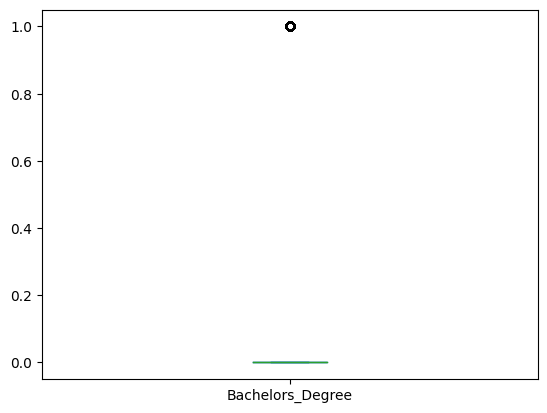

In [53]:
# Bachelors_Degree check
salary_df['Bachelors_Degree'].plot(kind='box')

<AxesSubplot: >

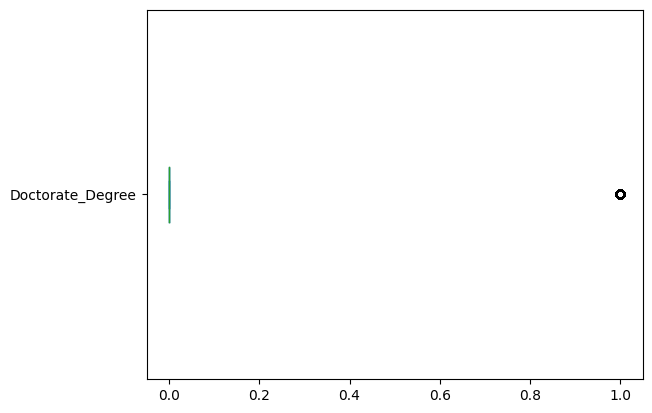

In [54]:
# Doctorate_Degree check
salary_df['Doctorate_Degree'].plot(kind='box', vert = False)

<AxesSubplot: >

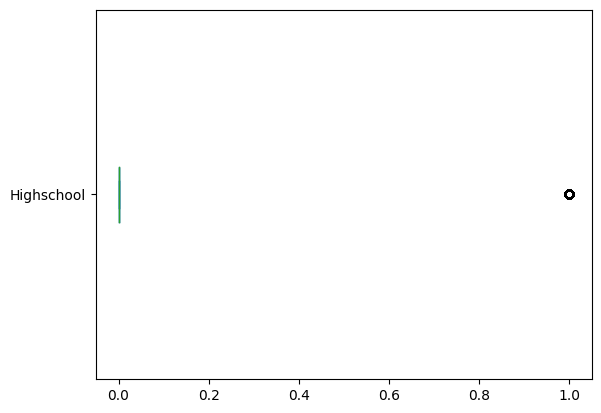

In [55]:
# Highschool check
salary_df['Highschool'].plot(kind='box', vert = False)

<AxesSubplot: >

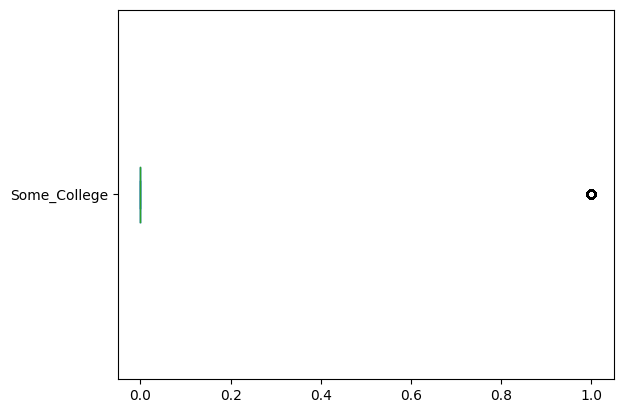

In [56]:
# Some_College check
salary_df['Some_College'].plot(kind='box', vert = False)

---

# Questioning

---

## Questions:

## Answer: